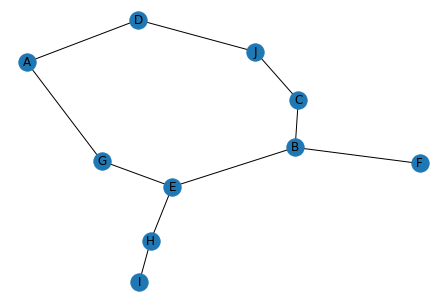

In [1]:
import networkx as nx

graph = nx.Graph()

graph.add_node("A")
graph.add_node("B")
graph.add_node("C")
graph.add_node("D")
graph.add_node("E")
graph.add_node("F")
graph.add_node("G")
graph.add_node("H")
graph.add_node("I")
graph.add_node("J")

graph.add_edge("A","D",weight=2)
graph.add_edge("B","E",weight=5)
graph.add_edge("C","B",weight=9)
graph.add_edge("A","G",weight=1)
graph.add_edge("J","D",weight=3)
graph.add_edge("H","E",weight=7)
graph.add_edge("F","B",weight=4)
graph.add_edge("J","C",weight=6)
graph.add_edge("I","H",weight=8)
graph.add_edge("E","G",weight=11)

nx.draw(graph,with_labels = True)

In [2]:
def getWeights(initialNode,listOfConnectedNodes):
    
    weights = []
    for x in listOfConnectedNodes:
        data = graph.get_edge_data(initialNode,x)
        weights.append(data['weight'])
    return weights

In [3]:
def listOfConnectedNodes(g,node):
    finalList = []
    cntNodes = list(g.edges(node))
    for x in range(0,len(cntNodes)):
        finalList.append(cntNodes[x][1])
    return finalList

In [4]:
def getListOfMinimum(listOfWeights):
    finalList = []
    for x in range(0,len(listOfWeights)):
        if listOfWeights[x][0] != "*" :
            finalList.append(listOfWeights[x][0])
    return finalList

In [5]:
def getNode(val,dictionay):
    for z in dictionay.keys():
        if val == dictionay[z][0]:
            return z

# Breadth First Search

In [6]:
def bfs(g,startingNode):
    finalSequence = []
    queueList = []
    
    finalSequence.append(startingNode)
    queueList.append(startingNode)
    
    for j in range(0,len(list(g.nodes()))):
        listOfNodes = listOfConnectedNodes(g,queueList[0])
        
        for x in listOfNodes:
            
            if x not in finalSequence:
                finalSequence.append(x)
                queueList.append(x)
                
        if len(queueList) > 0:
            queueList.pop(0)
            
    print(finalSequence)

In [7]:
bfs(graph,"A")

['A', 'D', 'G', 'J', 'E', 'C', 'B', 'H', 'F', 'I']


# Depth first search

In [15]:
def dfs(g,startingNode):
    stackList = []
    stackList.append(startingNode)
    finalSequence = []

    while len(stackList) != 0:
        
        currentNode = stackList[len(stackList) - 1]
        stackList.pop()
        if currentNode not in finalSequence:
            finalSequence.append(currentNode)
        connectedNodes = listOfConnectedNodes(g,currentNode)
        
        for connectedNode in connectedNodes:
            if connectedNode not in finalSequence:
                stackList.append(connectedNode)
    
    print(finalSequence)

In [17]:
dfs(graph,"D")

['D', 'J', 'C', 'B', 'F', 'E', 'G', 'A', 'H', 'I']


# Dijkstra Algorithm

In [10]:
def dijkstraAlgorithm(g,startNode,endNode):
    
    shortestPath = []
    
    nodes = list(g.nodes())    
    priorityDict = {node : ["*","*"] for node in nodes}
    alreadyVisited = []
    currentWeight = 0
    currentNode = startNode
    
    for m in range(0,len(nodes)):
        alreadyVisited.append(currentNode)
        connectedNodes = listOfConnectedNodes(g,currentNode)
        weights = getWeights(currentNode,connectedNodes)
        connectedNodesWeights = dict(zip(connectedNodes,weights))

        for x in connectedNodesWeights.keys():
            if x in priorityDict:
                possibleShortPath = connectedNodesWeights[x] + currentWeight
                if priorityDict[x][0] == "*" or possibleShortPath < priorityDict[x][0]:
                    priorityDict[x][0] = possibleShortPath
                    priorityDict[x][1] = currentNode
            
        listOfWeights = getListOfMinimum(list(priorityDict.values()))
        for l in range (0,len(listOfWeights)):
            currentWeight = min(listOfWeights)
            currentNode = getNode(currentWeight,priorityDict)
            if currentNode not in alreadyVisited or len(alreadyVisited) == len(nodes):
                break
            else:
                listOfWeights.remove(min(listOfWeights))
    
    trivarsalNode = endNode
    while True:
        shortestPath.append(trivarsalNode)
        trivarsalNode = priorityDict[trivarsalNode][1]
        
        if trivarsalNode == startNode:
            shortestPath.append(trivarsalNode)
            break
    
    for j in range(len(shortestPath) - 1,-1,-1):
        print(shortestPath[j] + " ----> ",end="")
        
    print("Reached!")

In [12]:
dijkstraAlgorithm(graph,"H","D")

H ----> E ----> G ----> A ----> D ----> Reached!
